## DIAMONDS

In [167]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

Read csv original file.

In [168]:
df = pd.read_csv('D:\ironhack\proyectos\diamonds\csv\diamonds_price2022.csv')

In [169]:
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
37503,37504,0.43,Good,F,SI1,63.7,57.0,984,4.79,4.73,3.04
47838,47839,0.53,Very Good,D,VS1,59.4,59.0,1907,5.25,5.32,3.14
20148,20149,1.20,Premium,G,VS1,62.8,58.0,8602,6.84,6.75,4.27
49659,49660,0.71,Very Good,I,SI1,61.5,58.0,2141,5.67,5.72,3.50
52844,52845,0.70,Ideal,D,SI2,62.1,56.0,2575,5.67,5.71,3.53


In [170]:
df.shape

(53943, 11)

In [171]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Data cleaning and preparation.
### Change Categorical values to Numerical values.

#### Change clarity column.

Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification. A stone is graded as flawless if, under 10-power magnification, no inclusions (internal flaws) and no blemishes (external imperfections) are visible.

In [173]:
# The bigger the number, the more clear and clean the diamond, so the more expensive has to be.
new_dict = {"IF": 7, "VVS1": 6, "VVS2": 5, "VS1": 4, "VS2": 3, "SI1": 2, "SI2" :1, "S1": 0, "I1": 8}

In [174]:
df["transform_clarity"] = df["clarity"].replace(new_dict)

#### Change color column. 

Diamonds occur in a variety of colors—steel gray, white, blue, yellow, orange, red, green, pink to purple, brown, and black. Colored diamonds contain interstitial impurities or structural defects that cause the coloration; pure diamonds are perfectly transparent and colorless.

In [175]:
# the higger the number the less clear the diamond is, so the higger the number the cheaper will be. 
color = {"G": 3, "E": 5, "F": 4, "H": 2, "D": 6, "I": 1, "J": 0}

In [176]:
df["new_color"] = df["color"].replace(color)

#### Replace cut column.

A diamond's cut refers to how well-proportioned the dimensions of a diamond are, and how these surfaces, or facets, are positioned to create sparkle and brilliance.

In [177]:
# the higger the  number the more expensive will be.
cuting = {"Fair": 0, "Good": 1, "Very Good": 2, "Ideal": 3, "Premium": 4, "Ideal" : 5}

In [178]:
df["new_cut"] = df["cut"].replace(cuting)

In [179]:
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,transform_clarity,new_color,new_cut
8050,8051,0.25,Very Good,F,VVS2,61.2,55.0,583,4.10,4.14,2.52,5,4,2
50052,50053,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26,5,4,2
18784,18785,1.75,Ideal,H,I1,61.6,56.0,7680,7.73,7.75,4.77,8,2,5
25676,25677,1.95,Very Good,H,SI1,62.9,58.0,14603,7.86,7.94,4.97,2,2,2
42575,42576,0.51,Very Good,H,VS2,60.1,59.8,1328,5.14,5.19,3.10,3,2,2
31401,31402,0.30,Ideal,G,VVS1,61.5,57.0,764,4.28,4.31,2.64,6,3,5
22752,22753,1.12,Ideal,E,VVS2,60.6,57.0,10769,6.77,6.66,4.07,5,5,5
10565,10566,1.00,Premium,H,SI1,58.3,60.0,4816,6.50,6.44,3.77,2,2,4
42,43,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61,3,6,1
33312,33313,0.35,Ideal,D,SI1,60.7,57.0,827,4.57,4.53,2.76,2,6,5


After changing the columns on numerical, we´ll clean the rest and leave only numerical.

In [180]:
# drop columns.
df.drop( columns= ["cut", "color", "clarity", "Unnamed: 0"], inplace=True)

In [181]:
# rename columns.
df.rename({"transform_clarity":"clarity",
           "new_color":"color",
           "new_cut":"cut"},inplace=True, axis=1)

In [182]:
df.sample()

,carat,depth,table,price,x,y,z,clarity,color,cut
9163,1.02,60.7,56.0,4541,6.53,6.5,3.95,1,4,5


In [183]:
df_clean = df.copy()

### Exploration.

#### Correlation.

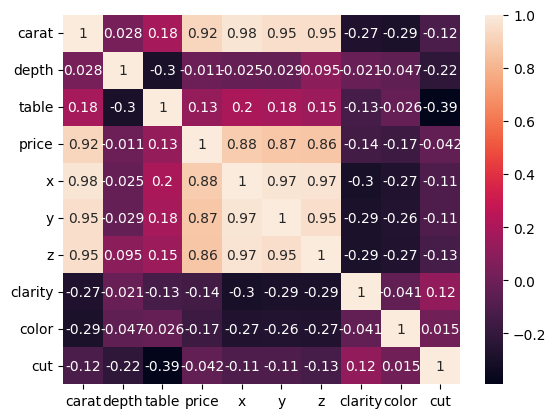

In [184]:
# correlation.
corr = df_clean.corr()
sns.heatmap(corr, annot= True);

Theres a lot of correlation bethween the x, y, z sizes of the diamond and the carat, the carat is actually the weight of the diamond, so the bigger the sizes of the diamond the bigger the carat.

In [185]:
# dop columns x, y, z because it has correlation with the carat, that the carat is acctually the weight. 
df_clean.drop(columns=["x", "y", "z"],inplace=True)

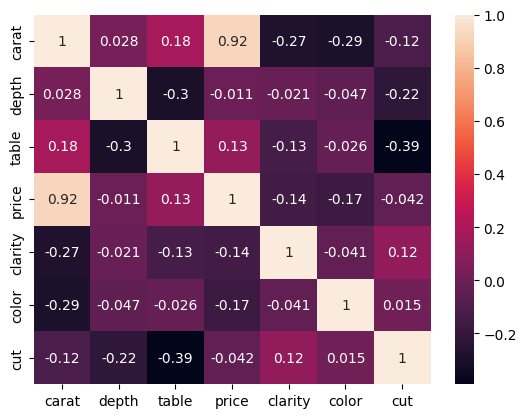

In [186]:
corr = df_clean.corr()
sns.heatmap(corr, annot= True);

#### Boxplots.

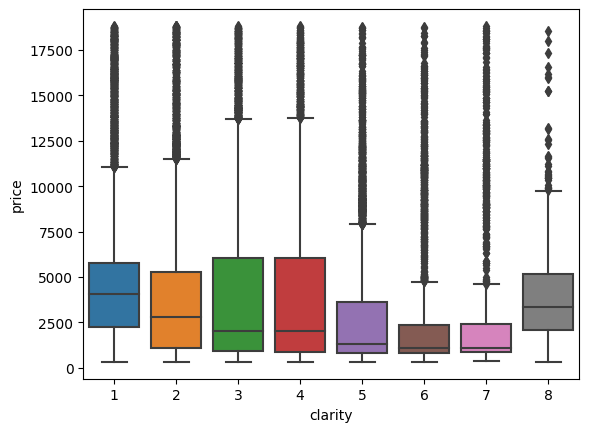

In [187]:
sns.boxplot(x="clarity", y="price", data=df_clean);

In [188]:
dfx = df_clean[(df_clean["price"] > 9)&(df_clean["clarity"]==6)]
dfx.value_counts()

carat  depth  table  price  clarity  color  cut
0.40   62.4   54.0   1043   6        3      5      3
0.31   62.0   54.0   840    6        4      5      3
0.32   61.8   54.0   814    6        3      5      2
0.31   62.5   56.0   772    6        3      5      2
0.30   61.9   57.0   665    6        2      5      2
                                                  ..
0.32   62.2   55.0   886    6        4      2      1
                     1061   6        5      5      1
                     1080   6        3      5      1
              56.0   730    6        2      5      1
2.31   62.1   58.0   16100  6        0      4      1
Name: count, Length: 3590, dtype: int64

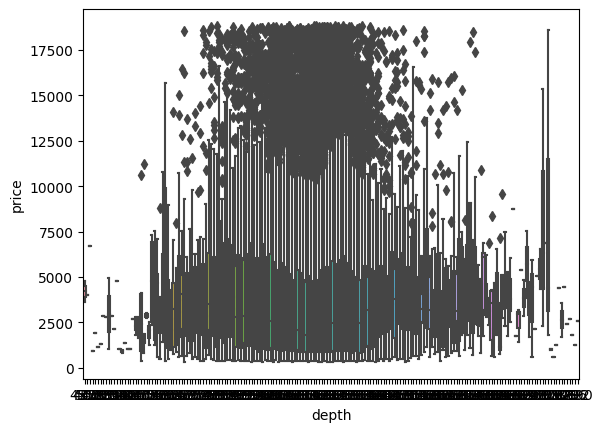

In [189]:
sns.boxplot(x="depth", y="price", data=df_clean);

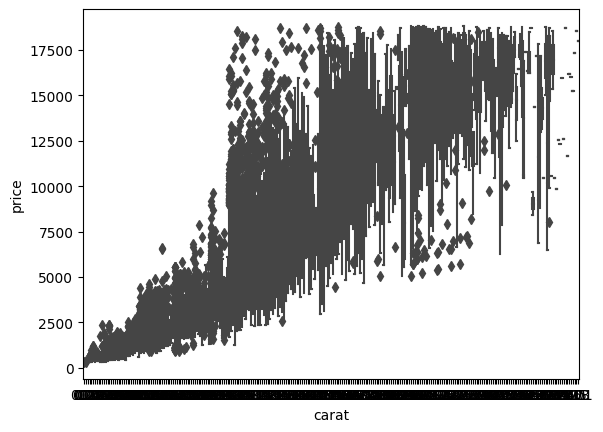

In [190]:
sns.boxplot(x="carat", y="price", data=df_clean);

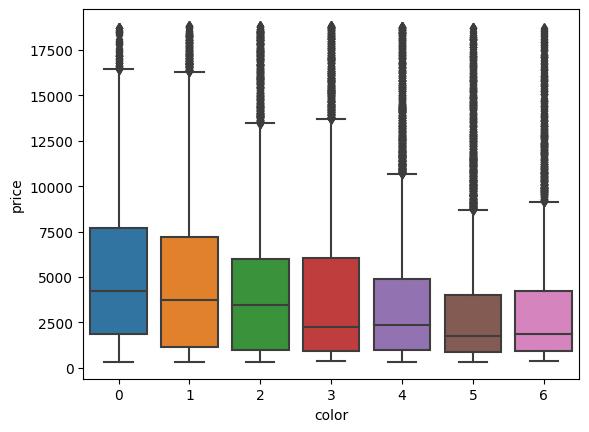

In [191]:
sns.boxplot(x="color", y="price", data=df_clean);

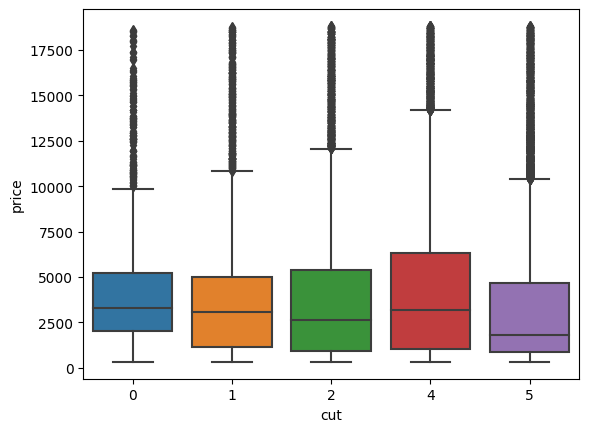

In [192]:
sns.boxplot(x="cut", y="price", data=df_clean);

Explore all the posible utliers from all the columns. 

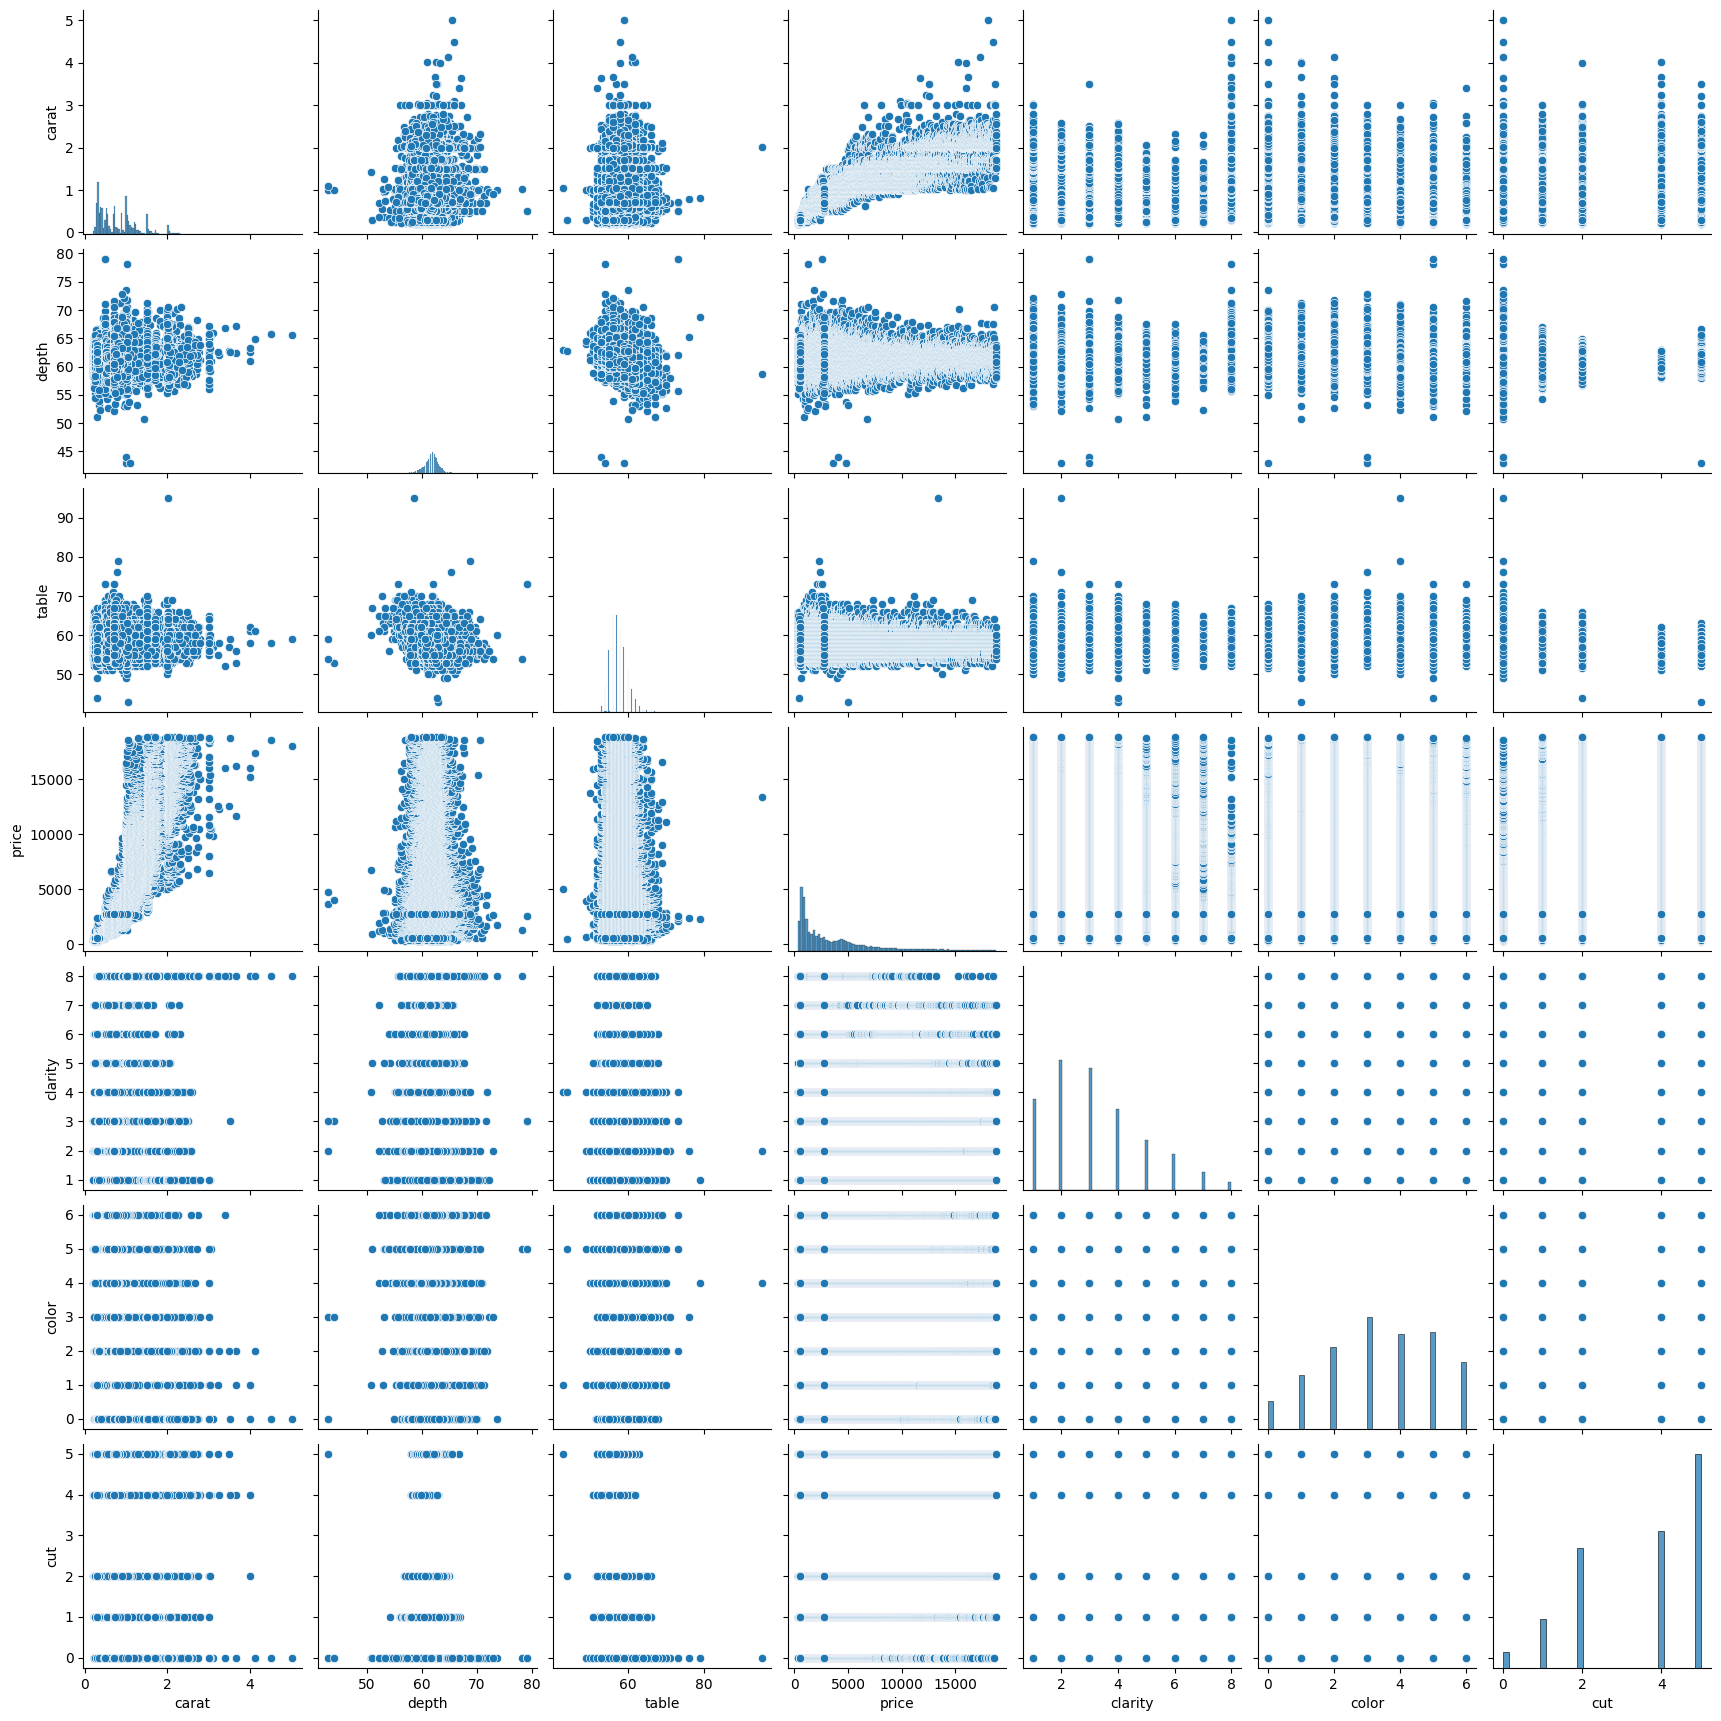

In [105]:
sns.pairplot(df_clean);

#### CARAT Outlier 
theres just 2 values with more than 4 in carat column, and it matches that its on 0 cut(that is the poorest) and the more expensive.
- it apears on 0 cut, that are the most cheapest thats why its different, but it matches with the highest color type and the higest clarity, no the highest cut,so theres a reason why, but there are just 2 values.

In [193]:
x = df_clean[(df_clean["carat"] > 3.8)]
x

,carat,depth,table,price,clarity,color,cut
25998,4.01,61.0,61.0,15223,8,1,4
25999,4.01,62.5,62.0,15223,8,0,4
26444,4.00,63.3,58.0,15984,8,1,2
27130,4.13,64.8,61.0,17329,8,2,0
27415,5.01,65.5,59.0,18018,8,0,0
27630,4.50,65.8,58.0,18531,8,0,0


In [194]:
df_clean.drop(df_clean[df_clean.carat > 3.8].index, inplace=True)

#### DEPTH Outlier 
theres just 2 values with more than 75 in depth column, and another 2 with more less than 45.

In [195]:
x = df_clean[(df_clean["depth"] > 75)]
x

,carat,depth,table,price,clarity,color,cut
41918,1.03,78.2,54.0,1262,8,5,0
52860,0.50,79.0,73.0,2579,3,5,0
52861,0.50,79.0,73.0,2579,3,5,0


In [196]:
x = df_clean[(df_clean["depth"] < 45)]
x

,carat,depth,table,price,clarity,color,cut
4518,1.00,43.0,59.0,3634,2,3,0
6341,1.00,44.0,53.0,4032,3,3,0
10377,1.09,43.0,54.0,4778,3,0,5


In [197]:
# delete that outlier.
df_clean.drop(df_clean[df_clean.depth < 45].index, inplace=True)
df_clean.drop(df_clean[df_clean.depth > 75].index, inplace=True)

#### TABLE Outliers.
theres just one value with more than 80 in table column. it is without the best color, the best clarity, and it throws it as a higher price, dont match that well.

In [198]:
x = df_clean[(df_clean["table"] > 75)]
x

,carat,depth,table,price,clarity,color,cut
24932,2.01,58.6,95.0,13387,2,4,0
50773,0.81,68.8,79.0,2301,1,4,0
51342,0.79,65.3,76.0,2362,2,3,0


In [199]:
x = df_clean[(df_clean["table"] < 45)]
x

,carat,depth,table,price,clarity,color,cut
11368,1.04,62.9,43.0,4997,4,1,5
35633,0.29,62.8,44.0,474,4,5,2


In [200]:
# delete that outlier.
df_clean.drop(df_clean[df_clean.table > 75].index, inplace=True)
df_clean.drop(df_clean[df_clean.table < 45].index, inplace=True)

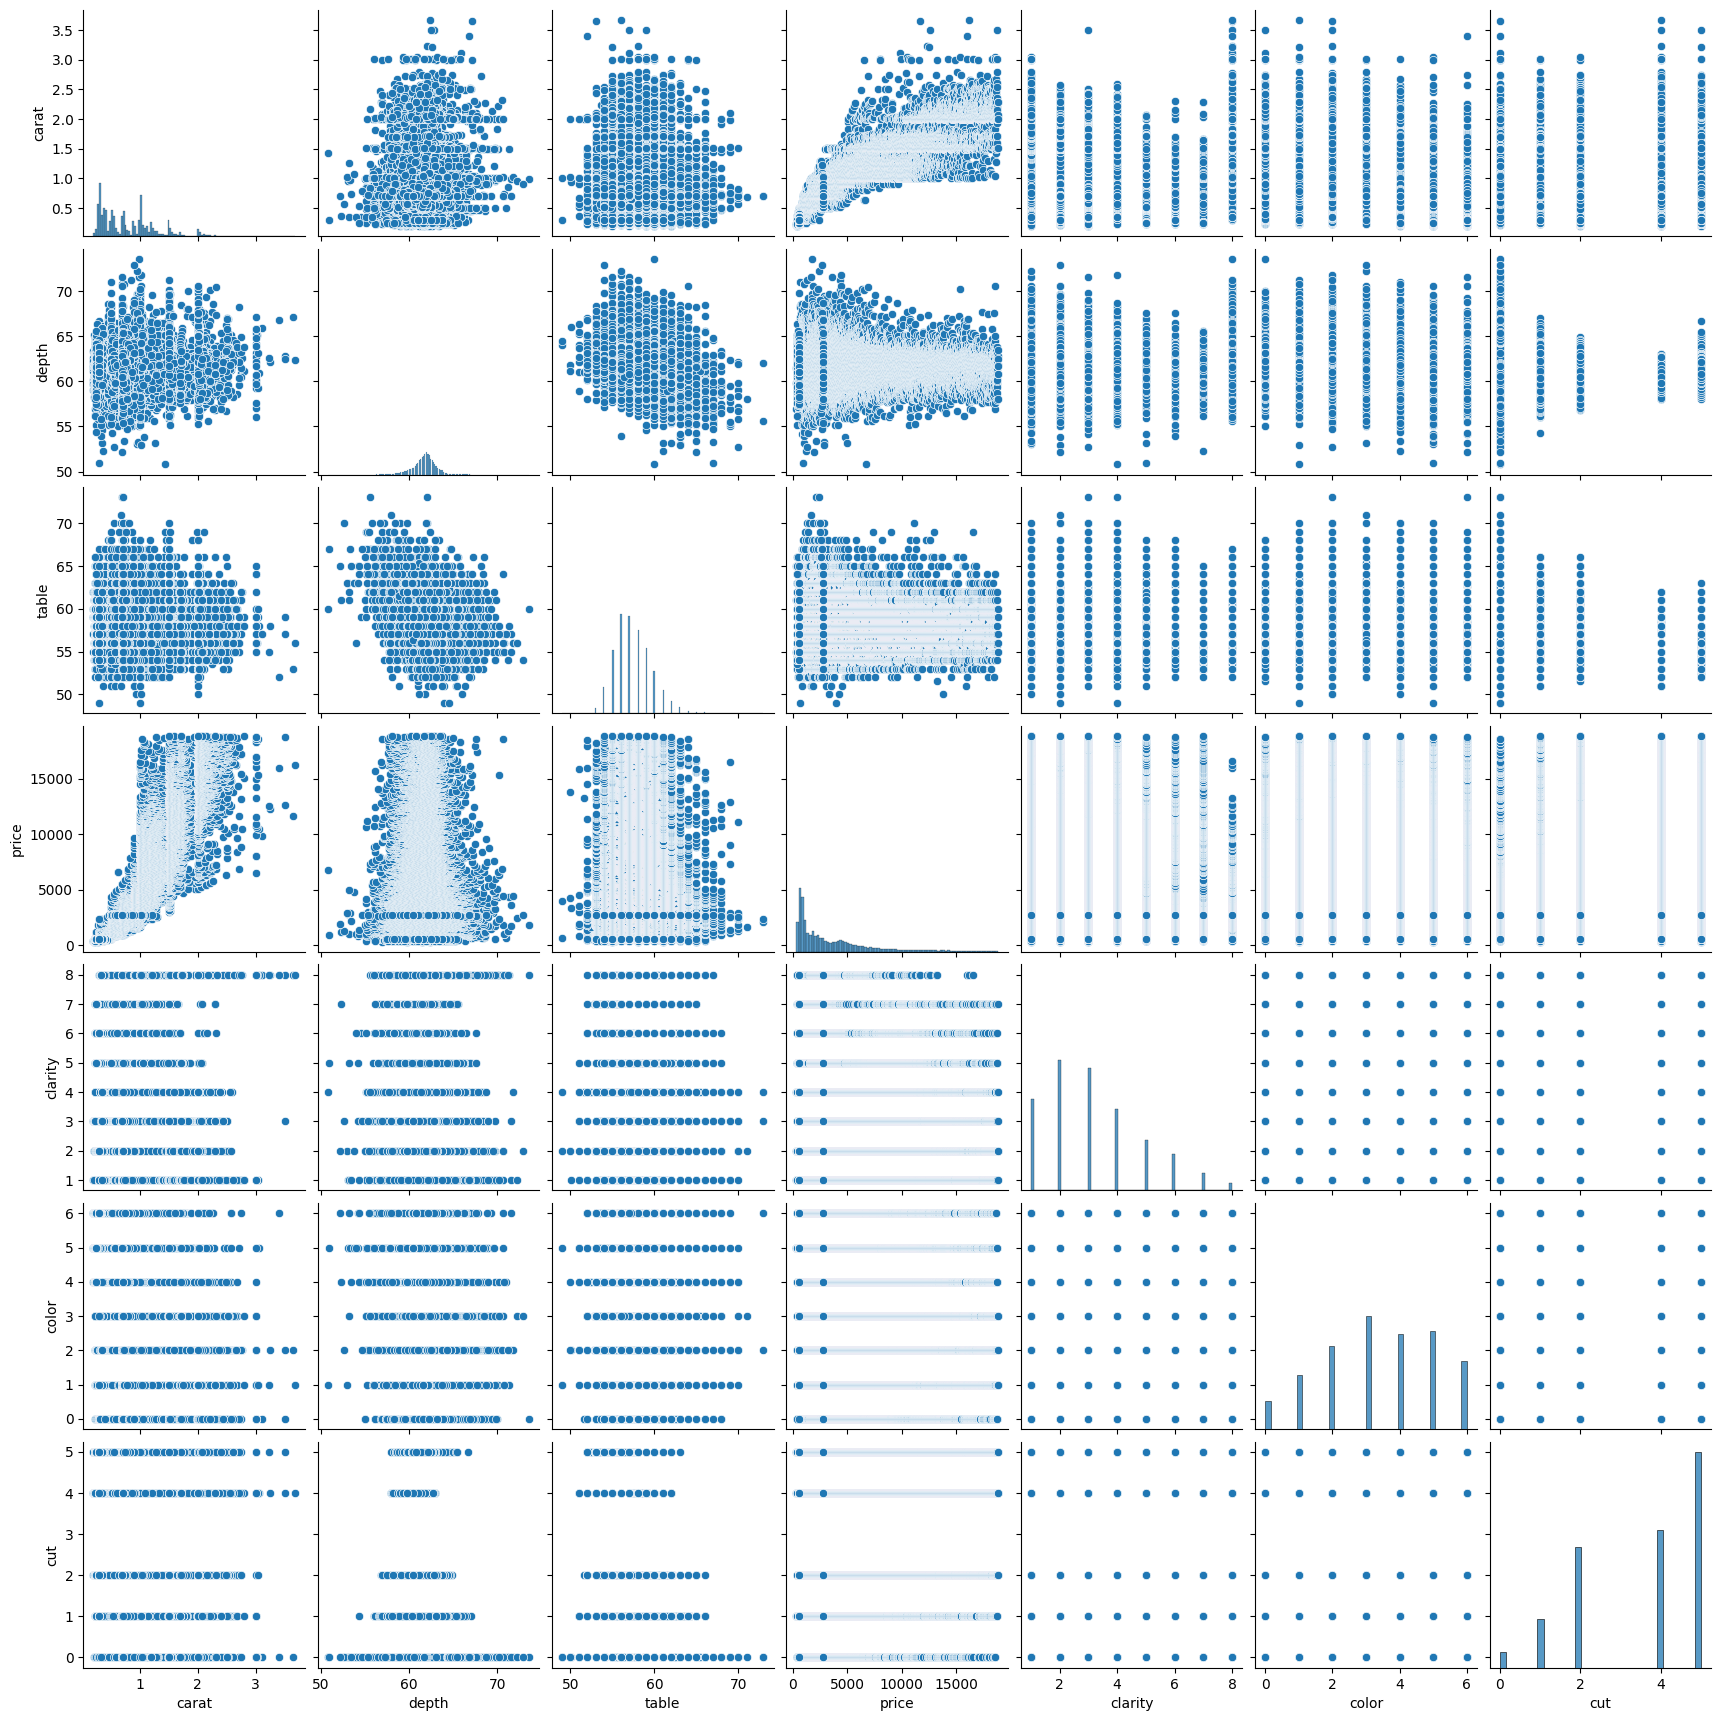

In [128]:
sns.pairplot(df_clean);

### Scale the values.

In [201]:
# scale the values.
scaler = MinMaxScaler()
columns = ["depth", "table", "carat", "clarity", "color", "cut"]
df_clean[columns] = scaler.fit_transform(df_clean[columns])

In [202]:
df_clean.sample(5)

,carat,depth,table,price,clarity,color,cut
1697,0.204611,0.412281,0.416667,3034,0.000000,0.166667,0.2
25673,0.417867,0.486842,0.333333,14593,0.285714,0.500000,1.0
3602,0.210375,0.600877,0.304167,3425,0.000000,0.500000,0.2
52844,0.144092,0.495614,0.291667,2575,0.000000,1.000000,1.0
18037,0.043228,0.521930,0.333333,614,0.142857,0.833333,0.4


In [203]:
df_clean.describe()

,carat,depth,table,price,clarity,color,cut
count,53926.000000,53926.000000,53926.000000,53926.000000,53926.000000,53926.000000,53926.000000
mean,0.172197,0.480219,0.352320,3931.327987,0.308619,0.567695,0.712002
std,0.136194,0.062274,0.092569,3987.385821,0.243576,0.283489,0.309541
min,0.000000,0.000000,0.000000,326.000000,0.000000,0.000000,0.000000
25%,0.057637,0.447368,0.291667,949.250000,0.142857,0.333333,0.400000
50%,0.144092,0.482456,0.333333,2401.000000,0.285714,0.500000,0.800000
75%,0.242075,0.513158,0.416667,5324.000000,0.428571,0.833333,1.000000
max,1.000000,1.000000,1.000000,18823.000000,1.000000,1.000000,1.000000


### TESTING

In [204]:
X = df_clean.drop("price", axis = 1)
y = df_clean.price

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression as LinReg
from sklearn import metrics

In [210]:
models = {
    "lr": LinReg(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR()
}

In [211]:
# Fit different models.
for name, model in models.items():
    print("Traning model: ", model)
    model.fit(X_train, y_train)

Traning model:  LinearRegression()
Traning model:  Ridge()
Traning model:  Lasso()
Traning model:  SGDRegressor()
Traning model:  KNeighborsRegressor()
Traning model:  GradientBoostingRegressor()
Traning model:  SVR()


In [212]:
# print the trainings errors values.
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------------{name}------------\n")
    print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print("\n")

------------lr------------

MAE, error: 887.9701387513351
MSE, error: 1948616.2154467795
RMSE, error: 1395.9284420939275
r2: 0.8797695011598184


------------ridge------------

MAE, error: 887.3259786703431
MSE, error: 1948866.5031626925
RMSE, error: 1396.018088408131
r2: 0.8797540582949284


------------lasso------------

MAE, error: 885.828223564727
MSE, error: 1950613.2587203986
RMSE, error: 1396.6435689610998
r2: 0.8796462826896603


------------sgd------------

MAE, error: 887.7163816819054
MSE, error: 1950392.1200281405
RMSE, error: 1396.5643988116483
r2: 0.8796599270466519


------------knn------------

MAE, error: 432.01826441683664
MSE, error: 670556.6904765436
RMSE, error: 818.8752594116784
r2: 0.9586263499412935


------------grad------------

MAE, error: 362.6306986464713
MSE, error: 438705.87130084966
RMSE, error: 662.3487535285694
r2: 0.9729316499921848


------------svr------------

MAE, error: 2049.5570381678076
MSE, error: 11850211.352389786
RMSE, error: 3442.413594033

In [188]:
from sklearn.feature_selection import RFE


In [189]:
grad = GradientBoostingRegressor()

In [190]:
grad.fit(X_train, y_train)

GradientBoostingRegressor()

In [191]:
y_pred = grad.predict(X_test)

In [192]:
y_pred

array([7.59605384, 8.37463547, 9.65616154, ..., 9.27380376, 7.46369438,
       7.66681741])

descargar csv test.
hacaer el mismo proceso de limpiar las mismas columnas, eliminar las mismas columnas etc.
hacer el test prediction con este csv.

In [194]:
new = pd.read_csv("D:\ironhack\semana_7\diamonds\\test.csv")

In [196]:
new = pd.read_csv("D:\ironhack\semana_7\diamonds\\test.csv")
new_dict = {"IF": 7,
            "VVS1": 6,
            "VVS2": 5,
            "VS1": 4,
            "VS2": 3,
            "SI1": 2,
            "SI2" :1,
            "S1": 0,
            "I1": 8}
new["transform_clarity"] = new["clarity"].replace(new_dict)
color = {"G": 3, 
    "E": 5,
    "F": 4,
    "H": 2,
    "D": 6, 
    "I": 1,
    "J": 0}
new["new_color"] = new["color"].replace(color)

In [197]:
cuting = {"Fair": 0,
        "Good": 1,
        "Very Good": 2,
        "Ideal": 3,
        "Premium": 4,
        "Ideal" : 5}
new["new_cut"] = df["cut"].replace(cuting)
new.drop( columns= ["cut", "color", "clarity"], inplace=True)
new.drop( columns= ["id"], inplace=True)
new.rename({"new_cut":"cut",
           "new_color":"color",
           "new_cut":"cut"}, inplace=True)

In [198]:
new.drop(columns=["x", "y", "z"],inplace=True)
new.rename({"transform_clarity":"clarity",
           "new_color":"color",
           "new_cut":"cut"},inplace=True, axis=1)
scaler = StandardScaler()
new["depth"] = scaler.fit_transform(new["depth"].values.reshape(-1, 1))
new["table"] = scaler.fit_transform(new["table"].values.reshape(-1, 1))

In [199]:
new

,carat,depth,table,clarity,color,cut
0,0.81,-0.173435,-0.207567,2,4,5
1,0.50,1.416906,0.241249,8,4,0
2,0.31,-1.141468,-0.656384,5,6,5
3,1.52,2.039213,0.241249,1,1,0
4,0.35,-0.657452,0.241249,6,6,4
...,...,...,...,...,...,...
13480,0.52,-0.242580,-0.656384,5,6,5
13481,1.01,-1.694631,0.690066,3,5,2
13482,1.50,-0.795742,1.587700,3,2,4
13483,0.40,0.518018,-1.554018,5,5,5


In [200]:
y_test_pred = grad.predict(new)

In [201]:
y_test_pred

array([8.084214  , 6.80789925, 6.79394636, ..., 9.21509269, 7.05410289,
       9.68409341])

In [203]:
x = pd.DataFrame(y_test_pred)

In [156]:
x[id]

,price,id
0,8.928,0
1,6.477,1
2,6.81,2
3,6.824,3
4,9.776,4
...,...,...
40451,9.077,40451
40452,8.892,40452
40453,6.385,40453
40454,9.455,40454


In [157]:
x.to_csv("D:\ironhack\semana_7\diamonds\\compe.csv")